In [1]:
import pandas as pd
df=pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [2]:
print(df.isnull().sum())
df['parental level of education'] = df['parental level of education'].astype('category').cat.codes

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


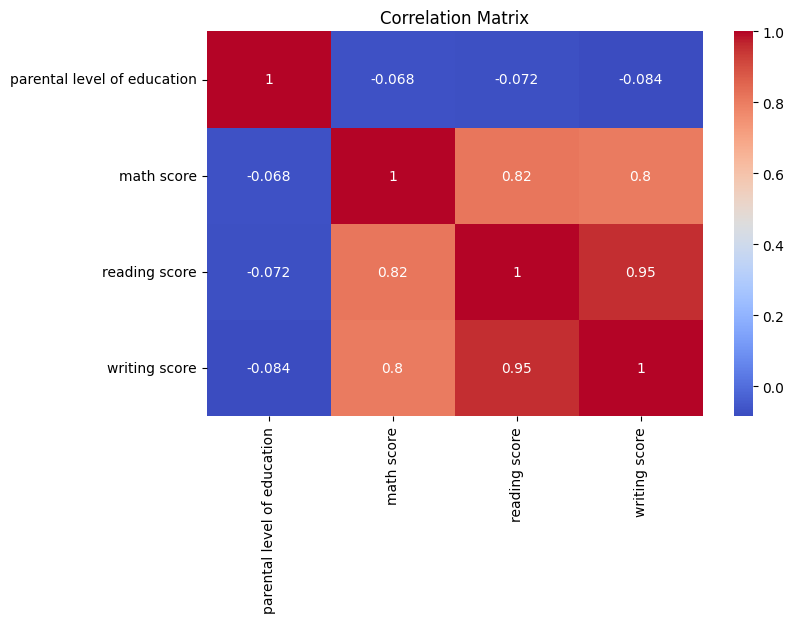

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

numeric_df = df.select_dtypes(include='number')
plt.figure(figsize=(8, 5))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


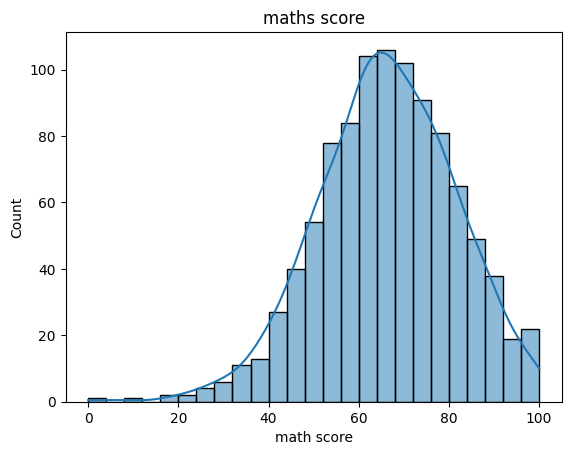

ValueError: could not convert string to float: 'female'

<Figure size 800x500 with 0 Axes>

In [4]:
sns.histplot(df['math score'],kde=True)
plt.title('maths score')
plt.show()

plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [9]:
X=df[['reading score','writing score']]
y=df['math score']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
model=LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [14]:
y_pred = model.predict(X_test)

comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison_df.head()


,Actual,Predicted
521,91,80.185526
737,53,65.684950
740,80,69.442109
660,74,72.016110
411,84,76.828277


In [15]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")


MAE: 7.351308782530512
RMSE: 8.788798451027851
R² Score: 0.6825697127424626


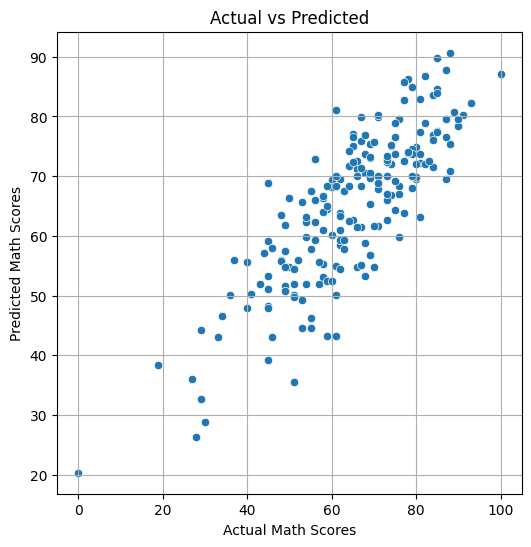

In [16]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Math Scores")
plt.ylabel("Predicted Math Scores")
plt.title("Actual vs Predicted")
plt.grid(True)
plt.show()


In [18]:
reading_score = 80
writing_score = 50

new_data = [[reading_score, writing_score]]

predicted_math_score = model.predict(new_data)

print(f"Predicted Math Score: {predicted_math_score[0]:.2f}")


Predicted Math Score: 67.49


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
